In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
sns.set_theme()
sns.set_context("paper", font_scale=1.8)

## Load all datastes

In [264]:
all_results = glob.glob("results/*")

In [265]:
results = pd.DataFrame()

for result in all_results:
    df = pd.read_csv(result)
    results = pd.concat([results, df])
results = results.reset_index(drop=True)

In [266]:
results

,loss,accuracy,val_loss,val_accuracy,epoch,model,optimizer,parameter,parameter_value,dataset
0,75.673203,0.100600,2.303293,0.092500,1,DenseNet,Adam,batch_size,128.0,cifar10
1,2.302704,0.101875,2.303188,0.092500,2,DenseNet,Adam,batch_size,128.0,cifar10
2,2.302647,0.101875,2.303098,0.092500,3,DenseNet,Adam,batch_size,128.0,cifar10
3,2.302643,0.100300,2.303085,0.092500,4,DenseNet,Adam,batch_size,128.0,cifar10
4,2.302649,0.101250,2.303006,0.092500,5,DenseNet,Adam,batch_size,128.0,cifar10
...,...,...,...,...,...,...,...,...,...,...
2425,0.002507,0.999146,0.188213,0.969667,26,ResNet20,RMSprop,batch_size,512.0,mnist
2426,0.002545,0.999396,0.095767,0.977333,27,ResNet20,RMSprop,batch_size,512.0,mnist
2427,0.003107,0.999062,0.034326,0.991500,28,ResNet20,RMSprop,batch_size,512.0,mnist
2428,0.002731,0.999125,0.105309,0.975417,29,ResNet20,RMSprop,batch_size,512.0,mnist


C:\Users\BELJAS~1\AppData\Local\Temp/ipykernel_27244/2031206915.py:15: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,5)


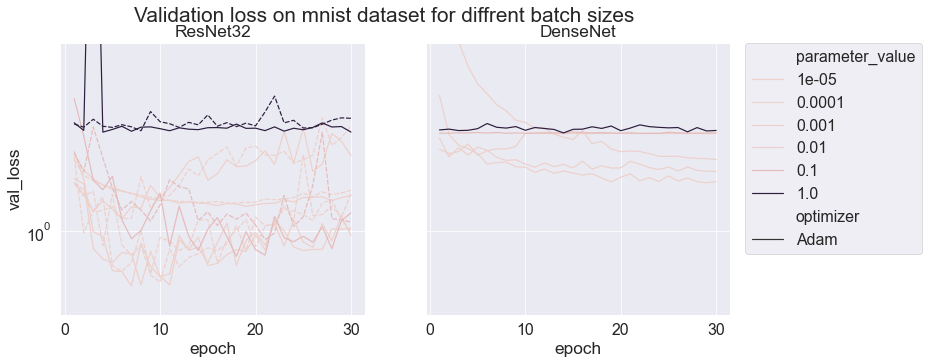

In [215]:

df = results.loc[(results.dataset == 'cifar10')&(results.parameter == 'learning_rate')]

fig, axs = plt.subplots(ncols=2, sharey=True, figsize = (5+5+2,5))
# color_palette = sns.color_palette("crest", as_cmap=True)

sns.lineplot(data=df.loc[(df.model == 'ResNet32')], x="epoch", y = "val_loss", style='optimizer', hue = "parameter_value", ax=axs[0], legend='full')
axs[0].set_title("ResNet32")
axs[0].legend([],[], frameon=False)
sns.lineplot(data=df.loc[(df.model == 'DenseNet')], x="epoch", y = "val_loss", style='optimizer', hue = "parameter_value", ax=axs[1], legend='full')
axs[1].set_title("DenseNet")
axs[1].legend([],[], frameon=False)

plt.suptitle("Validation loss on mnist dataset for diffrent batch sizes")
plt.yscale('log')
plt.ylim(0,5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [267]:
def plot_parameter_impact(results, dataset, parameter, title, save = False):
    

    df = results.loc[(results.dataset == dataset)&(results.parameter == parameter)]
    if parameter == "batch_size":
        df = df.astype({"parameter_value" : "int"})
    else:
        df = df.astype({"parameter_value" : "str"})
        

    models = df.model.unique()
    n_models = models.size
    fig, axs = plt.subplots(ncols=n_models, sharey=True, figsize = (4*n_models+2,5))

    for i, model in enumerate(models):
        sns.lineplot(data=df.loc[(df.model == model)], x="epoch", y = "val_loss", style='optimizer', hue = "parameter_value", ax=axs[i], legend='full')
        axs[i].set_title(model)
        axs[i].legend([],[], frameon=False)
        
#     plt.suptitle(title)
    plt.yscale('log')
    plt.ylim(0,5)
    plt.tight_layout()
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if save:
        pass
        # todo save

C:\Users\BELJAS~1\AppData\Local\Temp/ipykernel_27244/4175976626.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,5)


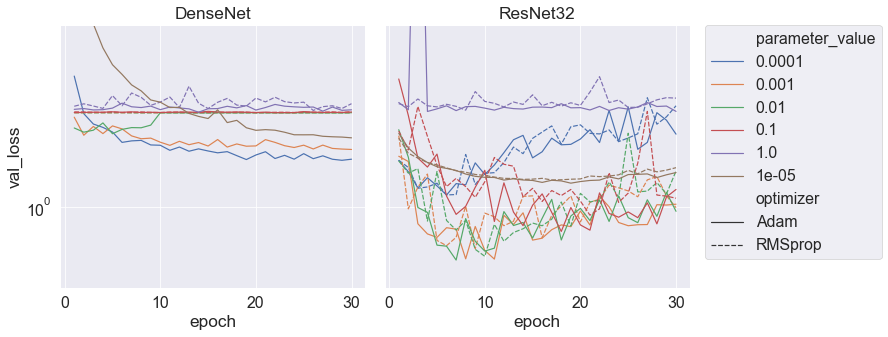

In [268]:
title = "Validation loss on cifar10 dataset for diffrent learning rates"
plot_parameter_impact(results, "cifar10", "learning_rate", title)

C:\Users\BELJAS~1\AppData\Local\Temp/ipykernel_27244/4175976626.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,5)


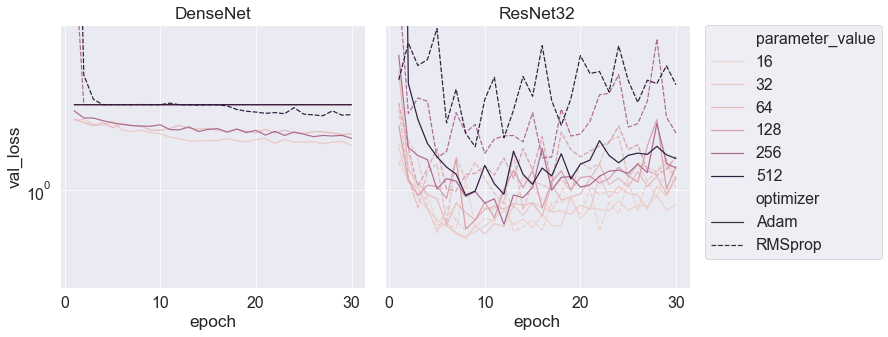

In [270]:
title = "Validation loss on cifar10 dataset for diffrent batch sizes"
plot_parameter_impact(results, "cifar10", "batch_size", title)

C:\Users\BELJAS~1\AppData\Local\Temp/ipykernel_27244/4175976626.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,5)


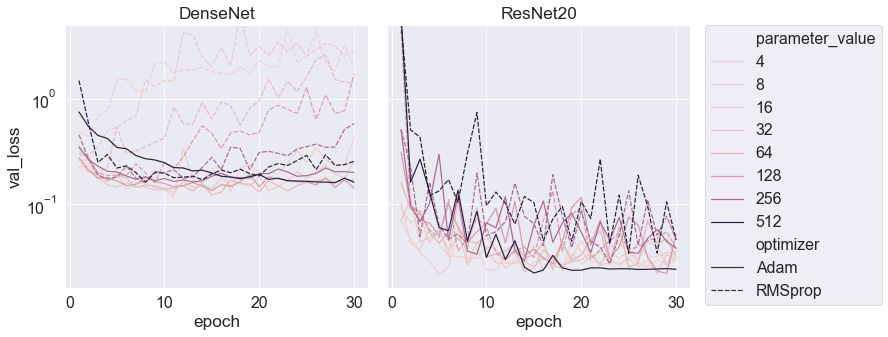

In [271]:
title = "Validation loss on mnist dataset for diffrent batch sizes"
plot_parameter_impact(results, "mnist", "batch_size", title)

C:\Users\BELJAS~1\AppData\Local\Temp/ipykernel_27244/4175976626.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0,5)


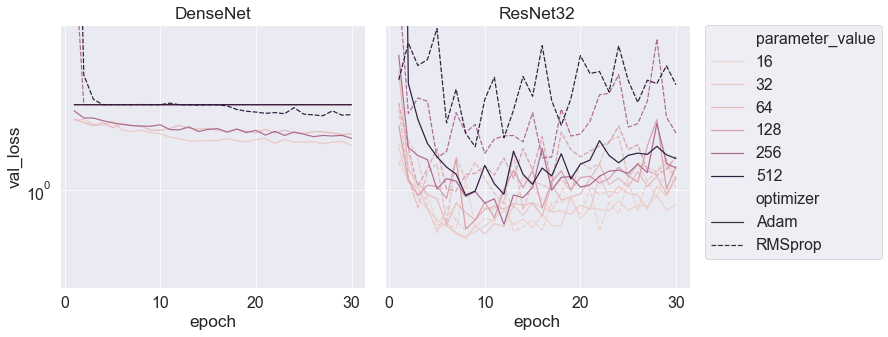

In [263]:
title = "Validation loss on cifar10 dataset for diffrent batch sizes"
plot_parameter_impact(results, "cifar10", "batch_size", title)